# Import Libraries

In [1]:
#Filter Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Technical indicator library
import talib as ta

# Data Source
import yfinance as yf
from sklearn.preprocessing import StandardScaler

# For time stamps
from datetime import datetime
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import os
from keras.models import load_model
import time

Text(0, 0.5, 'RMSE')

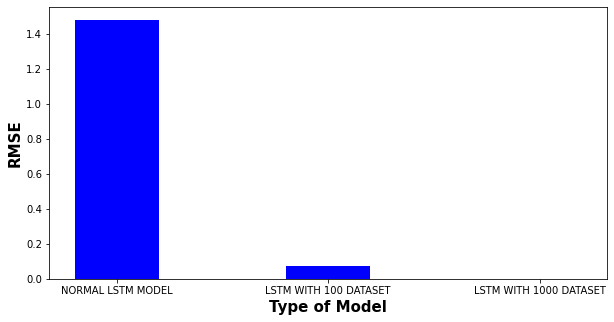

In [15]:
y = [1.4813449610204394,0.0743425369262694,0.0013693601042780374]
x = ["NORMAL LSTM MODEL", "LSTM WITH 100 DATASET", "LSTM WITH 1000 DATASET"]

fig = plt.figure(figsize = (10, 5))
plt.bar(x,y,width = 0.4,color ='b')
plt.xlabel('Type of Model', fontweight ='bold', fontsize = 15)
plt.ylabel('RMSE', fontweight ='bold', fontsize = 15)

# Hour model

In [103]:
path = 'hour/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[0]))
df.set_index("Datetime", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
x_train = []
y_train = []
for i in range(7,len(scaled_data)):
  x_train.append(scaled_data[i-7:i,0])
  y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
model = Sequential()
model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#Train Model
model.fit(x_train, y_train ,batch_size = 1,epochs = 100,verbose = False)
model.save('hourly_model.h5')

KeyboardInterrupt: 

In [ ]:
# for d in range(1,len(files)):
for d in range(1,len(files)):
    print("-------------------------------" + str(d)+"----------------------------")
    df = pd.read_csv(path+str(files[d]))
    df.set_index("Datetime", inplace=True)
    df = df.filter(["Close"])
    #Normalize data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(df)
    x_train = []
    y_train = []
    for i in range(7,len(scaled_data)):
        x_train.append(scaled_data[i-7:i,0])
        y_train.append(scaled_data[i,0])

    #Convert x_train and y_train to numpy array
    x_train , y_train = np.array(x_train), np.array(y_train)
    #Reshape data
    x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model.train_on_batch(x_train,y_train)
    df = pd.read_csv(path+str(files[d]))
    df.set_index("Datetime", inplace=True)
    df = df.filter(["Close"])
    #Normalize data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(df)
    x_train = []
    y_train = []
    for i in range(7,len(scaled_data)):
        x_train.append(scaled_data[i-7:i,0])
        y_train.append(scaled_data[i,0])

    #Convert x_train and y_train to numpy array
    x_train , y_train = np.array(x_train), np.array(y_train)
    #Reshape data
    x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = load_model('hourly_model.h5')
    model.fit(x_train, y_train, epochs = 100, batch_size = 1,verbose=False)
    model.save('hourly_model.h5')

-------------------------------1----------------------------
-------------------------------2----------------------------
-------------------------------3----------------------------
-------------------------------4----------------------------
-------------------------------5----------------------------
-------------------------------6----------------------------
-------------------------------7----------------------------
-------------------------------8----------------------------
-------------------------------9----------------------------
-------------------------------10----------------------------
-------------------------------11----------------------------
-------------------------------12----------------------------
-------------------------------13----------------------------
-------------------------------14----------------------------
-------------------------------15----------------------------
-------------------------------16----------------------------
-----------------

In [ ]:
path = 'hour/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[0]))
df.set_index("Datetime", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
# x_train = []
# y_train = []
training_data_len = int(len(df)*0.9)
#Create Training Dataset
# train_data = scaled_data[0:training_data_len, : ]
# for i in range(7,len(train_data)):
#   x_train.append(train_data[i-7:i,0])
#   y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
# x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
# x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# x_train.shape

#Create the testing dataset
test_data = scaled_data[training_data_len-7: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(7,len(test_data)):
  x_test.append(test_data[i-7:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 0s 12ms/step
[[ 0.65330255]
 [ 0.59798133]
 [ 0.6029523 ]
 [ 0.6279526 ]
 [ 0.54539365]
 [ 0.6125691 ]
 [ 0.34029394]
 [ 0.3059825 ]
 [ 0.25475073]
 [ 0.10740942]
 [-0.28958344]
 [-0.5451005 ]]


0.01161038875579834

1/1 [==============================] - 0s 81ms/step
RMSE : 0.045256058375040396
Predictions : [[ 9.788859]
 [ 9.794345]
 [ 9.774685]
 [ 9.763721]
 [ 9.692361]
 [ 9.688714]
 [ 9.921142]
 [10.025044]
 [10.039295]
 [10.109944]
 [10.095524]
 [10.173294]]
y_test : [[ 9.78999996]
 [ 9.77000046]
 [ 9.76000023]
 [ 9.68000031]
 [ 9.68000031]
 [ 9.98999977]
 [10.06000042]
 [10.06000042]
 [10.14000034]
 [10.11999989]
 [10.19999981]
 [10.15999985]]


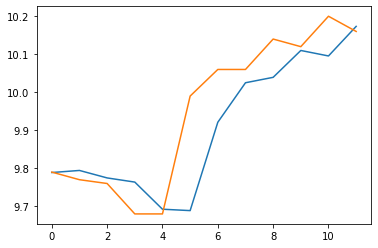

In [ ]:
#without pre trained
path = 'hour/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[2]))
df.set_index("Datetime", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
x_train = []
y_train = []
training_data_len = int(len(df)*0.9)
#Create Training Dataset
train_data = scaled_data[0:training_data_len, : ]
for i in range(7,len(train_data)):
  x_train.append(train_data[i-7:i,0])
  y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
model = Sequential()
model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#Train Model
model.fit(x_train, y_train ,batch_size = 1,epochs = 100,verbose = False)

#Create the testing dataset
test_data = scaled_data[training_data_len-7: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(7,len(test_data)):
  x_test.append(test_data[i-7:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE : " + str(rmse))
print("Predictions : " + str(predictions))
print("y_test : " + str(y_test))
print(plt.plot(predictions))
print(plt.plot(y_test))

1/1 [==============================] - 0s 72ms/step
RMSE : 0.04702266057332327
Predictions : [[ 9.767746 ]
 [ 9.783801 ]
 [ 9.751867 ]
 [ 9.708281 ]
 [ 9.703107 ]
 [ 9.640637 ]
 [10.003942 ]
 [10.093572 ]
 [10.126275 ]
 [10.092331 ]
 [10.0800295]
 [10.094142 ]]
y_test : [[ 9.78999996]
 [ 9.77000046]
 [ 9.76000023]
 [ 9.68000031]
 [ 9.68000031]
 [ 9.98999977]
 [10.06000042]
 [10.06000042]
 [10.14000034]
 [10.11999989]
 [10.19999981]
 [10.15999985]]


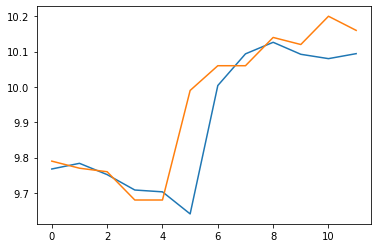

In [ ]:
#with pre trained
path = 'hour/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[2]))
df.set_index("Datetime", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
x_train = []
y_train = []
training_data_len = int(len(df)*0.9)
#Create Training Dataset
train_data = scaled_data[0:training_data_len, : ]
for i in range(7,len(train_data)):
  x_train.append(train_data[i-7:i,0])
  y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

pre_trained = load_model("hourly_model.h5")

# #Train Model
pre_trained.fit(x_train, y_train ,batch_size = 1,epochs = 100,verbose = False)

#Create the testing dataset
test_data = scaled_data[training_data_len-7: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(7,len(test_data)):
  x_test.append(test_data[i-7:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the models predicted price values
predictions = pre_trained.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE : " + str(rmse))
print("Predictions : " + str(predictions))
print("y_test : " + str(y_test))
print(plt.plot(predictions))
print(plt.plot(y_test))

# Daily model

In [104]:
path = 'daily/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[0]))
df.set_index("Date", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
x_train = []
y_train = []
for i in range(60,len(scaled_data)):
  x_train.append(scaled_data[i-60:i,0])
  y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
daily_model = Sequential()
daily_model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
daily_model.add(Dense(1))
daily_model.compile(loss='mean_squared_error', optimizer='adam')

#Train Model
daily_model.fit(x_train, y_train ,batch_size = 1,epochs = 100,verbose = False)
daily_model.save('daily_model60.h5')

KeyboardInterrupt: 

In [ ]:
for d in range(1,len(files)):
    print("-------------------------------" + str(d)+"----------------------------")
    df = pd.read_csv(path+str(files[d]))
    df.set_index("Date", inplace=True)
    df = df.filter(["Close"])
    #Normalize data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(df)
    x_train = []
    y_train = []
    for i in range(60,len(scaled_data)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])

    #Convert x_train and y_train to numpy array
    x_train , y_train = np.array(x_train), np.array(y_train)
    #Reshape data
    x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    daily_model = load_model('daily_model60.h5')
    daily_model.fit(x_train, y_train, epochs = 100, batch_size = 1,verbose=False)
    daily_model.save('daily_model60.h5')

-------------------------------1----------------------------


KeyboardInterrupt: 

In [ ]:
path = 'daily/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[2]))
df.set_index("Date", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
# x_train = []
# y_train = []
training_data_len = int(len(df)*0.9)
#Create Training Dataset
# train_data = scaled_data[0:training_data_len, : ]
# for i in range(7,len(train_data)):
#   x_train.append(train_data[i-7:i,0])
#   y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
# x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
# x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# x_train.shape

#Create the testing dataset
test_data = scaled_data[training_data_len-60: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the models predicted price values
predictions = daily_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 0s 11ms/step


0.0743425369262694

C:\Users\keong\AppData\Local\Temp\ipykernel_26416\504934145.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


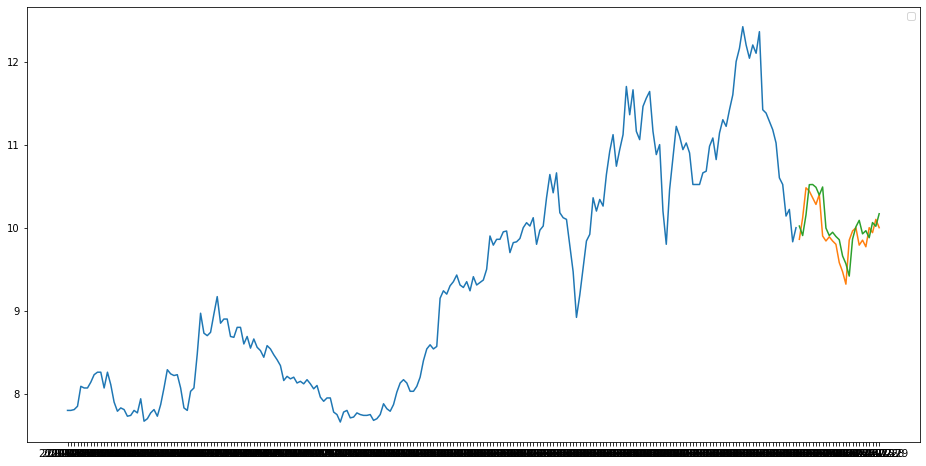

In [ ]:
#Plot the graph
train = df[:training_data_len]
valid = df[training_data_len:]
valid["Predictions"] = predictions
#visualise data
plt.figure(figsize = (16,8))
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend()

Epoch 1/100
165/165 [==============================] - 1s 5ms/step - loss: 0.0483
Epoch 2/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0147
Epoch 3/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0118
Epoch 4/100
165/165 [==============================] - 1s 5ms/step - loss: 0.0118
Epoch 5/100
165/165 [==============================] - 1s 5ms/step - loss: 0.0101
Epoch 6/100
165/165 [==============================] - 1s 5ms/step - loss: 0.0097
Epoch 7/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0095
Epoch 8/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0088
Epoch 9/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0085
Epoch 10/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0081
Epoch 11/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 12/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0069
Epoch 13/100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


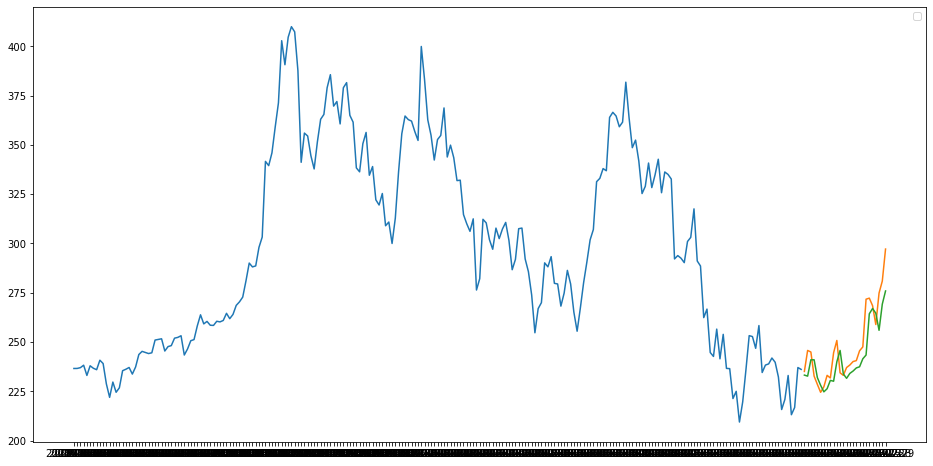

In [107]:
#without pre trained
path = 'daily/' 
files = os.listdir(path)
# df = pd.read_csv(path+str(files[2]))
df = pd.read_csv(path+"TSLA_daily.csv")
df.set_index("Date", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
x_train = []
y_train = []
training_data_len = int(len(df)*0.9)
#Create Training Dataset
train_data = scaled_data[0:training_data_len, : ]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
model = Sequential()
model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#Train Model
model.fit(x_train, y_train ,batch_size = 1,epochs = 100,verbose = True)

#Create the testing dataset
test_data = scaled_data[training_data_len-60: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE : " + str(rmse))
print("Predictions : " + str(predictions))
print("y_test : " + str(y_test))

#Plot the graph
train = df[:training_data_len]
valid = df[training_data_len:]
valid["Predictions"] = predictions
#visualise data
plt.figure(figsize = (16,8))
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend()

In [ ]:
#with few shot pre trained
path = 'daily/' 
files = os.listdir(path)
# df = pd.read_csv(path+str(files[2]))
df = pd.read_csv(path+"TSLA_daily.csv")
df.set_index("Date", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
x_train = []
y_train = []
training_data_len = int(len(df)*0.9)
#Create Training Dataset
train_data = scaled_data[0:training_data_len, : ]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

pre_trained = load_model("daily_model60.h5")

# #Train Model
pre_trained.fit(x_train, y_train ,batch_size = 1,epochs = 100,verbose = False)

#Create the testing dataset
test_data = scaled_data[training_data_len-60: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the models predicted price values
predictions = pre_trained.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE : " + str(rmse))
print("Predictions : " + str(predictions))
print("y_test : " + str(y_test))
#Plot the graph
train = df[:training_data_len]
valid = df[training_data_len:]
valid["Predictions"] = predictions
#visualise data
plt.figure(figsize = (16,8))
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend()

ValueError: in user code:

    File "c:\Users\keong\anaconda3\envs\FYP\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\keong\anaconda3\envs\FYP\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\keong\anaconda3\envs\FYP\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\keong\anaconda3\envs\FYP\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\keong\anaconda3\envs\FYP\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\keong\anaconda3\envs\FYP\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 7, 1), found shape=(1, 60, 1)


1/1 [==============================] - 0s 89ms/step


C:\Users\keong\AppData\Local\Temp\ipykernel_26416\3803748305.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RMSE : 0.47079526461087084
Predictions : [[232.09996]
 [256.74146]
 [256.7113 ]
 [243.05989]
 [235.02234]
 [224.28914]
 [227.01   ]
 [220.42825]
 [236.17009]
 [232.80516]
 [242.803  ]
 [248.52092]
 [242.58946]
 [235.11736]
 [237.32089]
 [238.73149]
 [244.52545]
 [251.95757]
 [248.15268]
 [249.93762]
 [274.71713]
 [275.90726]
 [274.3524 ]
 [264.17145]
 [277.54016]
 [280.77493]]
y_test : [[235.07000732]
 [245.70666504]
 [244.91999817]
 [232.66333008]
 [228.49000549]
 [224.47332764]
 [227.26333618]
 [233.06666565]
 [231.7333374 ]
 [244.54333496]
 [250.76333618]
 [234.34333801]
 [233.07000732]
 [237.03999329]
 [238.31333923]
 [240.06666565]
 [240.54666138]
 [245.52999878]
 [247.5       ]
 [271.70666504]
 [272.24334717]
 [268.43331909]
 [258.85998535]
 [274.82000732]
 [280.8999939 ]
 [297.1499939 ]]


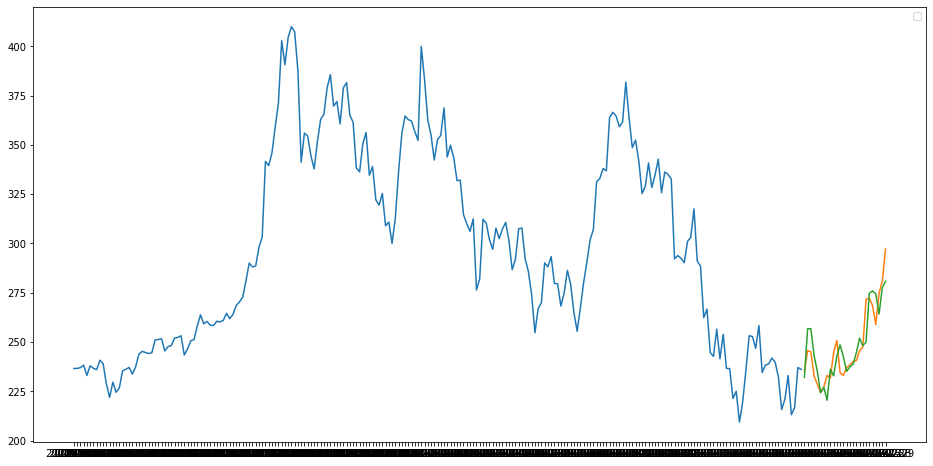

In [ ]:
#with zero shot pre trained
path = 'daily/' 
files = os.listdir(path)
# df = pd.read_csv(path+str(files[2]))
df = pd.read_csv(path+"TSLA_daily.csv")
df.set_index("Date", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)
x_train = []
y_train = []
training_data_len = int(len(df)*0.9)
#Create Training Dataset
train_data = scaled_data[0:training_data_len, : ]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

pre_trained = load_model("daily_model60.h5")

# #Train Model
# pre_trained.fit(x_train, y_train ,batch_size = 1,epochs = 100,verbose = False)

#Create the testing dataset
test_data = scaled_data[training_data_len-60: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the models predicted price values
predictions = pre_trained.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE : " + str(rmse))
print("Predictions : " + str(predictions))
print("y_test : " + str(y_test))
#Plot the graph
train = df[:training_data_len]
valid = df[training_data_len:]
valid["Predictions"] = predictions
#visualise data
plt.figure(figsize = (16,8))
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend()

# Daily_dataset model

In [91]:
#concat all data into 1 in order to save scaler
import os
import pandas as pd
 
# iterate over all files within "My_Folder"
for file in os.listdir("daily_dataset"):
    if file.endswith(".csv"):
        tmp = pd.read_csv(os.path.join("daily_dataset", file))
        tmp = tmp.filter(["Close"])
        tmp.to_csv("merged_daily.csv", index=False, header=False, mode='a')

In [92]:
#save scaler
merged = pd.read_csv("merged_daily.csv")
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(merged)
import pickle
scalerfile = 'scaler_daily.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))


In [93]:
#Load scaler
import pickle
scalerfile = 'scaler_daily.sav'
scaler_daily = pickle.load(open(scalerfile, 'rb'))

In [94]:
path = 'daily_dataset/' 
files = os.listdir(path)
# df = pd.read_csv(path+str(files[0]))
df = pd.read_csv("GRAB.csv")
df.set_index("Date", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_daily.fit_transform(df)
x_train = []
y_train = []
for i in range(7,len(scaled_data)):
  x_train.append(scaled_data[i-7:i,0])
  y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
daily_model = Sequential()
daily_model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
daily_model.add(Dense(1))
daily_model.compile(loss='mean_squared_error', optimizer='adam')

#Train Model
daily_model.fit(x_train, y_train ,batch_size = 1,epochs = 10,verbose = 1)
daily_model.save('daily_dataset_model7.h5')

Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0264
Epoch 2/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 3/10
398/398 [==============================] - 1s 1ms/step - loss: 0.0026
Epoch 4/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 5/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 6/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 7/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 8/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 9/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 10/10
398/398 [==============================] - 0s 1ms/step - loss: 0.0018


In [95]:
for d in range(1,len(files)):
    print("-------------------------------" + str(d)+"----------------------------")
    df = pd.read_csv(path+str(files[d]))
    df.set_index("Date", inplace=True)
    df = df.filter(["Close"])
    #Normalize data
    scaled_data = scaler_daily.fit_transform(df)
    x_train = []
    y_train = []
    for i in range(7,len(scaled_data)):
        x_train.append(scaled_data[i-7:i,0])
        y_train.append(scaled_data[i,0])

    #Convert x_train and y_train to numpy array
    x_train , y_train = np.array(x_train), np.array(y_train)
    #Reshape data
    x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    daily_model = load_model('daily_dataset_model7.h5')
    daily_model.fit(x_train, y_train, epochs = 10, batch_size = 1,verbose=False)
    daily_model.save('daily_dataset_model7.h5')

-------------------------------1----------------------------
-------------------------------2----------------------------
-------------------------------3----------------------------
-------------------------------4----------------------------
-------------------------------5----------------------------
-------------------------------6----------------------------
-------------------------------7----------------------------
-------------------------------8----------------------------
-------------------------------9----------------------------
-------------------------------10----------------------------
-------------------------------11----------------------------
-------------------------------12----------------------------
-------------------------------13----------------------------
-------------------------------14----------------------------
-------------------------------15----------------------------
-------------------------------16----------------------------
-----------------

In [96]:
daily_model = load_model('daily_dataset_model7.h5')
path = 'daily_dataset/' 
files = os.listdir(path)
df = pd.read_csv("GRAB.csv")
df.set_index("Date", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_daily.fit_transform(df)
# x_train = []
# y_train = []
# training_data_len = int(len(df)*0.9)
training_data_len = 7
#Create Training Dataset
# train_data = scaled_data[0:training_data_len, : ]
# for i in range(7,len(train_data)):
#   x_train.append(train_data[i-7:i,0])
#   y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
# x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
# x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# x_train.shape

#Create the testing dataset
test_data = scaled_data[training_data_len-7: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(7,len(test_data)):
  x_test.append(test_data[i-7:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the models predicted price values
predictions = daily_model.predict(x_test)
predictions = scaler_daily.inverse_transform(predictions)
y_test = scaler_daily.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

13/13 [==============================] - 0s 1ms/step


0.0013693601042780374

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


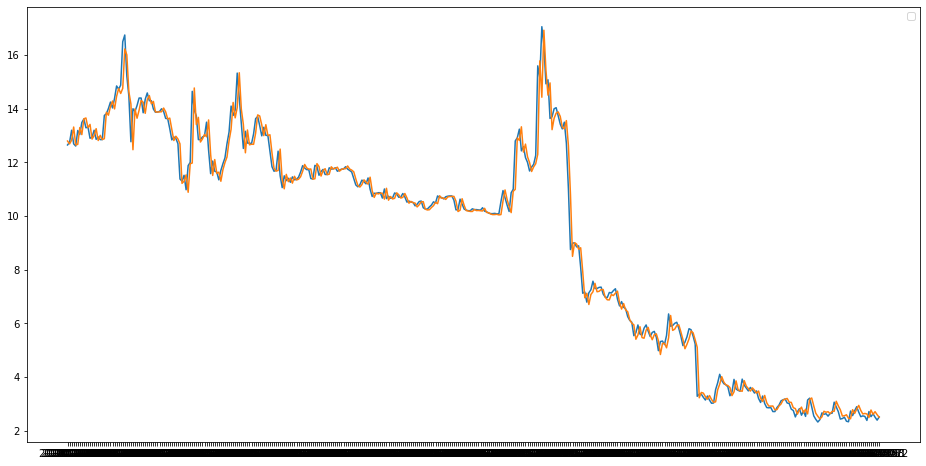

In [97]:
#Plot the graph
train = df[:training_data_len]
valid = df[training_data_len:]
valid["Predictions"] = predictions
#visualise data
plt.figure(figsize = (16,8))
# plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend()

# Weekly_dataset model

In [70]:
#concat all data into 1 in order to save scaler
import os
import pandas as pd
 
# iterate over all files within "My_Folder"
for file in os.listdir("weekly_dataset"):
    if file.endswith(".csv"):
        tmp = pd.read_csv(os.path.join("weekly_dataset", file))
        tmp = tmp.filter(["Close"])
        tmp.to_csv("merged_weekly.csv", index=False, header=False, mode='a')

In [71]:
#save scaler
merged = pd.read_csv("merged_weekly.csv")
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(merged)
import pickle
scalerfile = 'scaler_weekly.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [72]:
#Load scaler
import pickle
scalerfile = 'scaler_weekly.sav'
scaler_weekly = pickle.load(open(scalerfile, 'rb'))

In [78]:
path = 'weekly_dataset/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[0]))
df.set_index("Date", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_weekly.fit_transform(df)
x_train = []
y_train = []
for i in range(4,len(scaled_data)):
  x_train.append(scaled_data[i-4:i,0])
  y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
weekly_model = Sequential()
weekly_model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
weekly_model.add(Dense(1))
weekly_model.compile(loss='mean_squared_error', optimizer='adam')

#Train Model
weekly_model.fit(x_train, y_train ,batch_size = 1,epochs = 10,verbose = True)
weekly_model.save('weekly_dataset_model4.h5')

Epoch 1/10
101/101 [==============================] - 0s 1ms/step - loss: 0.1462
Epoch 2/10
101/101 [==============================] - 0s 992us/step - loss: 0.0207
Epoch 3/10
101/101 [==============================] - 0s 917us/step - loss: 0.0155
Epoch 4/10
101/101 [==============================] - 0s 885us/step - loss: 0.0136
Epoch 5/10
101/101 [==============================] - 0s 939us/step - loss: 0.0131
Epoch 6/10
101/101 [==============================] - 0s 980us/step - loss: 0.0131
Epoch 7/10
101/101 [==============================] - 0s 958us/step - loss: 0.0119
Epoch 8/10
101/101 [==============================] - 0s 881us/step - loss: 0.0108
Epoch 9/10
101/101 [==============================] - 0s 888us/step - loss: 0.0111
Epoch 10/10
101/101 [==============================] - 0s 876us/step - loss: 0.0117


In [80]:
for d in range(1,len(files)):
    print("-------------------------------" + str(d)+"----------------------------")
    df = pd.read_csv(path+str(files[d]))
    df.set_index("Date", inplace=True)
    df = df.filter(["Close"])
    #Normalize data
    scaled_data = scaler_weekly.fit_transform(df)
    x_train = []
    y_train = []
    for i in range(4,len(scaled_data)):
        x_train.append(scaled_data[i-4:i,0])
        y_train.append(scaled_data[i,0])

    #Convert x_train and y_train to numpy array
    x_train , y_train = np.array(x_train), np.array(y_train)
    #Reshape data
    x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    weekly_model = load_model('weekly_dataset_model4.h5')
    weekly_model.fit(x_train, y_train, epochs = 1, batch_size = 1,verbose=True)
    # weekly_model.save('weekly_dataset_model4.h5')

-------------------------------1----------------------------
109/109 [==============================] - 0s 913us/step - loss: nan
-------------------------------2----------------------------
109/109 [==============================] - 0s 991us/step - loss: nan
-------------------------------3----------------------------
102/102 [==============================] - 0s 956us/step - loss: nan
-------------------------------4----------------------------
109/109 [==============================] - 0s 949us/step - loss: nan
-------------------------------5----------------------------
109/109 [==============================] - 0s 948us/step - loss: nan
-------------------------------6----------------------------
101/101 [==============================] - 0s 947us/step - loss: 0.0179
-------------------------------7----------------------------
82/82 [==============================] - 0s 969us/step - loss: 0.0135
-------------------------------8----------------------------
109/109 [================

KeyboardInterrupt: 

In [134]:
files = os.listdir(path)
df = pd.read_csv(path+str(files[2]))
df.set_index("Date", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_weekly.fit_transform(df)
# training_data_len = int(len(df)*0.9)
training_data_len = 4
#Create the testing dataset
test_data = scaled_data[training_data_len-4: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(4,len(test_data)):
  x_test.append(test_data[i-4:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the models predicted price values
weekly_model = load_model('weekly_dataset_model1.h5')
predictions = weekly_model.predict(x_test)
predictions = scaler_weekly.inverse_transform(predictions)
y_test = scaler_weekly.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4/4 [==============================] - 0s 1ms/step


nan

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


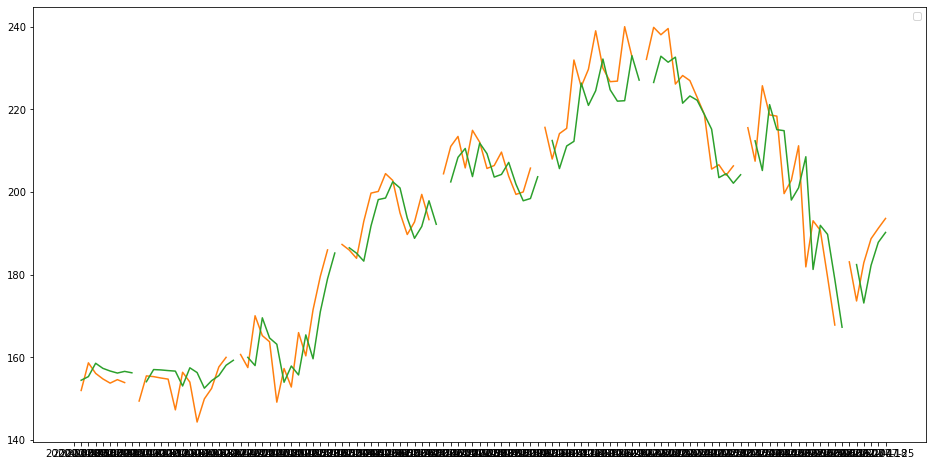

In [125]:
#Plot the graph
train = df[:training_data_len]
valid = df[training_data_len:]
valid["Predictions"] = predictions
#visualise data
plt.figure(figsize = (16,8))
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend()

In [151]:
a = [[[0.06070419]]]
lol =weekly_model.predict(a)
scaler_weekly.inverse_transform(lol)

1/1 [==============================] - 0s 19ms/step


array([[154.44257]], dtype=float32)

# 1h_dataset

In [71]:
#concat all data into 1 in order to save scaler
import os
import pandas as pd
 
# iterate over all files within "My_Folder"
for file in os.listdir("1h_dataset"):
    if file.endswith(".csv"):
        tmp = pd.read_csv(os.path.join("1h_dataset", file))
        tmp = tmp.filter(["Close"])
        tmp.to_csv("merged_1h.csv", index=False, header=False, mode='a')

In [72]:
#save scaler
merged = pd.read_csv("merged_1h.csv")
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(merged)
import pickle
scalerfile = 'scaler_1h.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [73]:
#Load scaler
import pickle
scalerfile = 'scaler_1h.sav'
scaler_1h = pickle.load(open(scalerfile, 'rb'))

In [74]:
path = '1h_dataset/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[0]))
df.set_index("Unnamed: 0", inplace=True)#datetime column
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_1h.fit_transform(df)
x_train = []
y_train = []
for i in range(6,len(scaled_data)):
  x_train.append(scaled_data[i-6:i,0])
  y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
daily_model = Sequential()
daily_model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
daily_model.add(Dense(1))
daily_model.compile(loss='mean_squared_error', optimizer='adam')

#Train Model
daily_model.fit(x_train, y_train ,batch_size = 1,epochs = 10,verbose = False)
daily_model.save('1h_dataset_model6.h5')

In [75]:
lst = []
nan_files = [1,5,22,26,41,44,56,63,77,150,160,170,175,202,228,325,342,461,475,477,478,577,627,634,637,658,659,660,667,674,680,681,770,784,843,847,862,868,886,899,950,968,987,]
for i in nan_files:
    lst.append(files[i])
for i in lst:
    files.remove(i)

In [76]:
for d in range(1,len(files)):
    print("-------------------------------" + str(d)+"----------------------------")
    df = pd.read_csv(path+str(files[d]))
    df.set_index("Unnamed: 0", inplace=True)
    df = df.filter(["Close"])
    #normalize data
    scaled_data = scaler_1h.fit_transform(df)
    x_train = []
    y_train = []
    for i in range(6,len(scaled_data)):
        x_train.append(scaled_data[i-6:i,0])
        y_train.append(scaled_data[i,0])
    #Conver x_train and y train into array
    x_train , y_train = np.array(x_train), np.array(y_train)
    #Reshape data
    x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    daily_model = load_model('1h_dataset_model6.h5')
    daily_model.fit(x_train,y_train,epochs = 100, batch_size = 1,verbose = False)
    daily_model.save('1h_dataset_model6.h5')

-------------------------------1----------------------------
-------------------------------2----------------------------
-------------------------------3----------------------------
-------------------------------4----------------------------
-------------------------------5----------------------------
-------------------------------6----------------------------
-------------------------------7----------------------------
-------------------------------8----------------------------
-------------------------------9----------------------------
-------------------------------10----------------------------
-------------------------------11----------------------------
-------------------------------12----------------------------
-------------------------------13----------------------------
-------------------------------14----------------------------
-------------------------------15----------------------------
-------------------------------16----------------------------
-----------------

In [77]:
df = pd.read_csv(path+str(files[900]))
df.set_index("Unnamed: 0", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_1h.fit_transform(df)
# x_train = []
# y_train = []
# training_data_len = int(len(df)*0.9)
training_data_len = 6
#Create Training Dataset
# train_data = scaled_data[0:training_data_len, : ]
# for i in range(7,len(train_data)):
#   x_train.append(train_data[i-7:i,0])
#   y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
# x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
# x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# x_train.shape

#Create the testing dataset
test_data = scaled_data[training_data_len-6: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(6,len(test_data)):
  x_test.append(test_data[i-6:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
daily_model = load_model('1h_dataset_model6.h5')
#get the models predicted price values
predictions = daily_model.predict(x_test)
predictions = scaler_1h.inverse_transform(predictions)
y_test = scaler_1h.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3/3 [==============================] - 0s 2ms/step


0.05304482542437991

# 5min_dataset

In [104]:
#concat all data into 1 in order to save scaler
import os
import pandas as pd
 
# iterate over all files within "My_Folder"
for file in os.listdir("5min_dataset"):
    if file.endswith(".csv"):
        tmp = pd.read_csv(os.path.join("5min_dataset", file))
        tmp = tmp.filter(["Close"])
        tmp.to_csv("merged_5min.csv", index=False, header=False, mode='a')

In [105]:
#save scaler
merged = pd.read_csv("merged_5min.csv")
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(merged)
import pickle
scalerfile = 'scaler_5min.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [106]:
#Load scaler
import pickle
scalerfile = 'scaler_5min.sav'
scaler_5min = pickle.load(open(scalerfile, 'rb'))

In [107]:
path = '5min_dataset/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[0]))
df.set_index("Datetime", inplace=True)#datetime column
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_5min.fit_transform(df)
x_train = []
y_train = []
for i in range(60,len(scaled_data)):
  x_train.append(scaled_data[i-60:i,0])
  y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
daily_model = Sequential()
daily_model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
daily_model.add(Dense(1))
daily_model.compile(loss='mean_squared_error', optimizer='adam')
#Train Model
daily_model.fit(x_train, y_train ,batch_size = 1,epochs = 10,verbose = True)
daily_model.save('5min_dataset_model60.h5')

Epoch 1/10
1267/1267 [==============================] - 6s 5ms/step - loss: 0.0081
Epoch 2/10
1267/1267 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 3/10
1267/1267 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 4/10
1267/1267 [==============================] - 6s 5ms/step - loss: 9.4125e-04
Epoch 5/10
1267/1267 [==============================] - 6s 5ms/step - loss: 8.2972e-04
Epoch 6/10
1267/1267 [==============================] - 6s 4ms/step - loss: 7.4113e-04
Epoch 7/10
1267/1267 [==============================] - 6s 4ms/step - loss: 7.5585e-04
Epoch 8/10
1267/1267 [==============================] - 6s 4ms/step - loss: 6.7555e-04
Epoch 9/10
1267/1267 [==============================] - 6s 4ms/step - loss: 6.2784e-04
Epoch 10/10
1267/1267 [==============================] - 6s 4ms/step - loss: 6.1682e-04


In [114]:
lst = []
nan_files = [28,32,105,113,139,195,236,246,279,316,334,340,455,469,472,473,485,529,554,558,560,601,675,701,775,779,788,791,793,800,801,812,823,854,860,880,887,891.951,959,964,965,971,977]
for i in nan_files:
    lst.append(str(files[int(i)]))
files[28]
for i in lst:
    files.remove(i)

In [115]:
for d in range(1,len(files)):
    print("-------------------------------" + str(d)+"----------------------------")
    df = pd.read_csv(path+str(files[d]))
    # df.set_index("Datetime", inplace=True)
    df = df.filter(["Close"])
    #normalize data
    scaled_data = scaler_5min.fit_transform(df)
    x_train = []
    y_train = []
    for i in range(60,len(scaled_data)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    #Conver x_train and y train into array
    x_train , y_train = np.array(x_train), np.array(y_train)
    #Reshape data
    x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    daily_model = load_model('5min_dataset_model60.h5')
    daily_model.fit(x_train,y_train,epochs = 10, batch_size = 1,verbose = False)
    daily_model.save('5min_dataset_model60.h5')

-------------------------------1----------------------------
-------------------------------2----------------------------
-------------------------------3----------------------------


KeyboardInterrupt: 

In [ ]:
df = pd.read_csv(path+str(files[900]))
df.set_index("Datetime", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_5min.fit_transform(df)
# x_train = []
# y_train = []
# training_data_len = int(len(df)*0.9)
training_data_len = 60
#Create Training Dataset
# train_data = scaled_data[0:training_data_len, : ]
# for i in range(7,len(train_data)):
#   x_train.append(train_data[i-7:i,0])
#   y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
# x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
# x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# x_train.shape

#Create the testing dataset
test_data = scaled_data[training_data_len-60: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
daily_model = load_model('5min_dataset_model60.h5')
#get the models predicted price values
predictions = daily_model.predict(x_test)
predictions = scaler_5min.inverse_transform(predictions)
y_test = scaler_5min.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

# 15min dataset

In [129]:
#concat all data into 1 in order to save scaler
import os
import pandas as pd
 
# iterate over all files within "My_Folder"
for file in os.listdir("15min_dataset"):
    if file.endswith(".csv"):
        tmp = pd.read_csv(os.path.join("15min_dataset", file))
        tmp = tmp.filter(["Close"])
        tmp.to_csv("merged_15min.csv", index=False, header=False, mode='a')

In [130]:
#save scaler
merged = pd.read_csv("merged_15min.csv")
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(merged)
import pickle
scalerfile = 'scaler_15min.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [131]:
#Load scaler
import pickle
scalerfile = 'scaler_15min.sav'
scaler_15min = pickle.load(open(scalerfile, 'rb'))

In [132]:
path = '15min_dataset/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[0]))
df.set_index("Unnamed: 0", inplace=True)#datetime column
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_15min.fit_transform(df)
x_train = []
y_train = []
for i in range(30,len(scaled_data)):
  x_train.append(scaled_data[i-30:i,0])
  y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
daily_model = Sequential()
daily_model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
daily_model.add(Dense(1))
daily_model.compile(loss='mean_squared_error', optimizer='adam')

#Train Model
daily_model.fit(x_train, y_train ,batch_size = 1,epochs = 10,verbose = True)
daily_model.save('15min_dataset_model30.h5')

Epoch 1/10
386/386 [==============================] - 1s 3ms/step - loss: 0.0434
Epoch 2/10
386/386 [==============================] - 1s 3ms/step - loss: 0.0062
Epoch 3/10
386/386 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 4/10
386/386 [==============================] - 1s 3ms/step - loss: 0.0044
Epoch 5/10
386/386 [==============================] - 1s 3ms/step - loss: 0.0040
Epoch 6/10
386/386 [==============================] - 1s 3ms/step - loss: 0.0037
Epoch 7/10
386/386 [==============================] - 1s 3ms/step - loss: 0.0032
Epoch 8/10
386/386 [==============================] - 1s 3ms/step - loss: 0.0030
Epoch 9/10
386/386 [==============================] - 1s 3ms/step - loss: 0.0029
Epoch 10/10
386/386 [==============================] - 1s 3ms/step - loss: 0.0028


In [133]:
lst = []
nan_files = [1,5,56,63,77,150,160,170,174,175,202,342,461,475,477,478,573,577,627,634,657,658,659,666,673,679,680,769,783,861,867,885,898,949,967,986,996]
for i in nan_files:
    lst.append(str(files[int(i)]))
for i in lst:
    files.remove(i)

In [134]:
for d in range(1,len(files)):
    print("-------------------------------" + str(d)+"----------------------------")
    df = pd.read_csv(path+str(files[d]))
    # df.set_index("Unnamed: 0", inplace=True)
    df = df.filter(["Close"])
    #normalize data
    scaled_data = scaler_15min.fit_transform(df)
    x_train = []
    y_train = []
    for i in range(30,len(scaled_data)):
        x_train.append(scaled_data[i-30:i,0])
        y_train.append(scaled_data[i,0])
    #Conver x_train and y train into array
    x_train , y_train = np.array(x_train), np.array(y_train)
    #Reshape data
    x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    daily_model = load_model('15min_dataset_model30.h5')
    daily_model.fit(x_train,y_train,epochs = 10, batch_size = 1,verbose = False)
    # daily_model.fit(x_train,y_train,epochs = 1,verbose = True)
    daily_model.save('15min_dataset_model30.h5')

-------------------------------1----------------------------
-------------------------------2----------------------------
-------------------------------3----------------------------
-------------------------------4----------------------------
-------------------------------5----------------------------
-------------------------------6----------------------------
-------------------------------7----------------------------
-------------------------------8----------------------------
-------------------------------9----------------------------
-------------------------------10----------------------------
-------------------------------11----------------------------
-------------------------------12----------------------------
-------------------------------13----------------------------
-------------------------------14----------------------------
-------------------------------15----------------------------
-------------------------------16----------------------------
-----------------

In [135]:
df = pd.read_csv(path+str(files[900]))
df.set_index("Unnamed: 0", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_15min.fit_transform(df)
# x_train = []
# y_train = []
# training_data_len = int(len(df)*0.9)
training_data_len = 30

#Create the testing dataset
test_data = scaled_data[training_data_len-30: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(30,len(test_data)):
  x_test.append(test_data[i-30:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
daily_model = load_model('15min_dataset_model30.h5')
#get the models predicted price values
predictions = daily_model.predict(x_test)
predictions = scaler_15min.inverse_transform(predictions)
y_test = scaler_15min.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9/9 [==============================] - 0s 2ms/step


0.09928864902920213

# 30min dataset

In [123]:
#concat all data into 1 in order to save scaler
import os
import pandas as pd
 
# iterate over all files within "My_Folder"
for file in os.listdir("30min_dataset"):
    if file.endswith(".csv"):
        tmp = pd.read_csv(os.path.join("30min_dataset", file))
        tmp = tmp.filter(["Close"])
        tmp.to_csv("merged_30min.csv", index=False, header=False, mode='a')

In [124]:
#save scaler
merged = pd.read_csv("merged_30min.csv")
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(merged)
import pickle
scalerfile = 'scaler_30min.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

#Load scaler
import pickle
scalerfile = 'scaler_30min.sav'
scaler_30min = pickle.load(open(scalerfile, 'rb'))

In [125]:
path = '30min_dataset/' 
files = os.listdir(path)
df = pd.read_csv(path+str(files[0]))
df.set_index("Unnamed: 0", inplace=True)#datetime column
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_30min.fit_transform(df)
x_train = []
y_train = []
for i in range(14,len(scaled_data)):
  x_train.append(scaled_data[i-14:i,0])
  y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
daily_model = Sequential()
daily_model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
daily_model.add(Dense(1))
daily_model.compile(loss='mean_squared_error', optimizer='adam')

#Train Model
daily_model.fit(x_train, y_train ,batch_size = 1,epochs = 10,verbose = True)
daily_model.save('30min_dataset_model14.h5')

Epoch 1/10
194/194 [==============================] - 1s 2ms/step - loss: 0.0837
Epoch 2/10
194/194 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3/10
194/194 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 4/10
194/194 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 5/10
194/194 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 6/10
194/194 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 7/10
194/194 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 8/10
194/194 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 9/10
194/194 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 10/10
194/194 [==============================] - 0s 2ms/step - loss: 0.0078


In [126]:
lst = []
nan_files = [1,5,22,26,41,44,56,63,77,101,141,150,160,170,174,175,202,322,342,461,475,477,478,498,573,577,634,657,658,659,666,673,676,679,680,769,783,857,861,867,885,898,967,986,996]
for i in nan_files:
    lst.append(str(files[int(i)]))
for i in lst:
    files.remove(i)

In [127]:
for d in range(1,len(files)):
    print("-------------------------------" + str(d)+"----------------------------")
    df = pd.read_csv(path+str(files[d]))
    # df.set_index("Unnamed: 0", inplace=True)
    df = df.filter(["Close"])
    #normalize data
    scaled_data = scaler_30min.fit_transform(df)
    x_train = []
    y_train = []
    for i in range(14,len(scaled_data)):
        x_train.append(scaled_data[i-14:i,0])
        y_train.append(scaled_data[i,0])
    #Conver x_train and y train into array
    x_train , y_train = np.array(x_train), np.array(y_train)
    #Reshape data
    x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    daily_model = load_model('30min_dataset_model14.h5')
    daily_model.fit(x_train,y_train,epochs = 10, batch_size = 1,verbose = False)
    # daily_model.fit(x_train,y_train,epochs = 1,verbose = True)
    daily_model.save('30min_dataset_model14.h5')

-------------------------------1----------------------------
-------------------------------2----------------------------
-------------------------------3----------------------------
-------------------------------4----------------------------
-------------------------------5----------------------------
-------------------------------6----------------------------
-------------------------------7----------------------------
-------------------------------8----------------------------
-------------------------------9----------------------------
-------------------------------10----------------------------
-------------------------------11----------------------------
-------------------------------12----------------------------
-------------------------------13----------------------------
-------------------------------14----------------------------
-------------------------------15----------------------------
-------------------------------16----------------------------
-----------------

In [128]:
df = pd.read_csv(path+str(files[900]))
df.set_index("Unnamed: 0", inplace=True)
df = df.filter(["Close"])
#Normalize data
scaled_data = scaler_30min.fit_transform(df)
# x_train = []
# y_train = []
# training_data_len = int(len(df)*0.9)
training_data_len = 14

#Create the testing dataset
test_data = scaled_data[training_data_len-14: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(14,len(test_data)):
  x_test.append(test_data[i-14:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
daily_model = load_model('30min_dataset_model14.h5')
#get the models predicted price values
predictions = daily_model.predict(x_test)
predictions = scaler_30min.inverse_transform(predictions)
y_test = scaler_30min.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5/5 [==============================] - 0s 2ms/step


0.08893104448710387